![Verne](https://www.vernegroup.com/wp-content/uploads/2021/08/Image-1-1-1.png)

# Estadística Descriptiva para variables continuas

In [1]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
conn = sqlite3.connect('/content/drive/MyDrive/Datos/Tiendas24H.sqlite')
query = "select c.CodCliente, FechaNacimiento,  round((julianday('now') - julianday(FechaNacimiento))/365) as Edad,EstadoCivil, Sexo,IngresosAnuales, HijosACargo, N.NivelAcademico, O.Ocupacion from clientes c inner join NivelAcademico N    on c.NivelAcademico = N.Codigo     inner join Ocupacion O on c.Ocupacion = o.Codigo"


In [5]:
TM = pd.read_sql_query(query,conn)

In [6]:
TM

,CodCliente,FechaNacimiento,Edad,EstadoCivil,Sexo,IngresosAnuales,HijosACargo,NivelAcademico,Ocupacion
0,000020,1976-04-08,45.0,M,M,90000.0,0.0,Licenciatura,Profesional especializado
1,000026,1975-05-14,46.0,S,M,60000.0,3.0,Licenciatura,Profesional especializado
2,000029,1975-08-12,46.0,M,M,60000.0,3.0,Licenciatura,Profesional especializado
3,000046,1978-02-15,43.0,S,F,70000.0,0.0,Licenciatura,Profesional especializado
4,000047,1978-08-08,43.0,S,F,80000.0,5.0,Licenciatura,Profesional especializado
...,...,...,...,...,...,...,...,...,...
2436,Y1795344R,1944-09-17,77.0,M,F,70000.0,0.0,Estudios de postgrado,Mando intermedio
2437,Y2404085R,1973-01-04,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado
2438,Y2544794L,1973-08-26,48.0,M,M,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado
2439,Y2671043K,1973-10-23,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado


In [7]:
TM["Edad"].describe()

count    2441.000000
mean       50.029496
std        11.579693
min        21.000000
25%        41.000000
50%        48.000000
75%        58.000000
max       101.000000
Name: Edad, dtype: float64

In [ ]:
TM["Edad"].mean()


50.029496108152394

In [ ]:
TM["Edad"].median()

48.0

In [ ]:
#Midiendo la dispersión
#La forma más sencilla, es midiendo el rango
TM["Edad"].max()-TM["Edad"].min()

80.0

In [ ]:
#Coeficiente de variación
TM["Edad"].std() /TM["Edad"].mean()

0.23145732129076757

In [ ]:
#Skweness mide la asimetría en la distribución de probabilidad. Si es positiva la disitribución tiene un "long tail" a la derecha de la media
TM["Edad"].skew()

0.48707623355505

In [ ]:
#Si la distribución tiene "long tails" en ambas partes - Kurtosis. Si es negativa indica que los tails son cortos
TM["Edad"].kurt()

-0.3548714244016917

# Discretizando variables continuas

In [8]:
#Con el mismdo ancho. Abiertas por laizquierda
TM["RangoEdad"] = pd.cut(TM["Edad"],5)


In [9]:
TM

,CodCliente,FechaNacimiento,Edad,EstadoCivil,Sexo,IngresosAnuales,HijosACargo,NivelAcademico,Ocupacion,RangoEdad
0,000020,1976-04-08,45.0,M,M,90000.0,0.0,Licenciatura,Profesional especializado,"(37.0, 53.0]"
1,000026,1975-05-14,46.0,S,M,60000.0,3.0,Licenciatura,Profesional especializado,"(37.0, 53.0]"
2,000029,1975-08-12,46.0,M,M,60000.0,3.0,Licenciatura,Profesional especializado,"(37.0, 53.0]"
3,000046,1978-02-15,43.0,S,F,70000.0,0.0,Licenciatura,Profesional especializado,"(37.0, 53.0]"
4,000047,1978-08-08,43.0,S,F,80000.0,5.0,Licenciatura,Profesional especializado,"(37.0, 53.0]"
...,...,...,...,...,...,...,...,...,...,...
2436,Y1795344R,1944-09-17,77.0,M,F,70000.0,0.0,Estudios de postgrado,Mando intermedio,"(69.0, 85.0]"
2437,Y2404085R,1973-01-04,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]"
2438,Y2544794L,1973-08-26,48.0,M,M,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]"
2439,Y2671043K,1973-10-23,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]"


In [ ]:
#Si queremos hacerlos de igual alto
TM["RangoEdad2"] = pd.qcut(TM["Edad"],5)


In [10]:
#Personalizado
custombins = [16,22,29,39,54,88]
TM["RangoEdad3"] = pd.cut(TM["Edad"],custombins)


In [11]:
TM

,CodCliente,FechaNacimiento,Edad,EstadoCivil,Sexo,IngresosAnuales,HijosACargo,NivelAcademico,Ocupacion,RangoEdad,RangoEdad3
0,000020,1976-04-08,45.0,M,M,90000.0,0.0,Licenciatura,Profesional especializado,"(37.0, 53.0]","(39, 54]"
1,000026,1975-05-14,46.0,S,M,60000.0,3.0,Licenciatura,Profesional especializado,"(37.0, 53.0]","(39, 54]"
2,000029,1975-08-12,46.0,M,M,60000.0,3.0,Licenciatura,Profesional especializado,"(37.0, 53.0]","(39, 54]"
3,000046,1978-02-15,43.0,S,F,70000.0,0.0,Licenciatura,Profesional especializado,"(37.0, 53.0]","(39, 54]"
4,000047,1978-08-08,43.0,S,F,80000.0,5.0,Licenciatura,Profesional especializado,"(37.0, 53.0]","(39, 54]"
...,...,...,...,...,...,...,...,...,...,...,...
2436,Y1795344R,1944-09-17,77.0,M,F,70000.0,0.0,Estudios de postgrado,Mando intermedio,"(69.0, 85.0]","(54, 88]"
2437,Y2404085R,1973-01-04,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]","(39, 54]"
2438,Y2544794L,1973-08-26,48.0,M,M,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]","(39, 54]"
2439,Y2671043K,1973-10-23,48.0,S,F,90000.0,0.0,Estudios universitarios (en curso),Profesional especializado,"(37.0, 53.0]","(39, 54]"


# Variables discretas

In [12]:
TM['NivelAcademico'].value_counts()

Licenciatura                          754
Estudios universitarios (en curso)    701
Estudios de postgrado                 467
Educación Secundaria                  389
Educación Secundaria (en curso)       129
Name: NivelAcademico, dtype: int64

In [13]:
#Definirlo como ordinal
TM['NivelAcademico'] = TM['NivelAcademico'].astype('category')
TM['NivelAcademico'].cat.categories

Index(['Educación Secundaria', 'Educación Secundaria (en curso)',
       'Estudios de postgrado', 'Estudios universitarios (en curso)',
       'Licenciatura'],
      dtype='object')

In [14]:
#Reordenar
TM['NivelAcademico'].cat.reorder_categories(['Educación Secundaria (en curso)','Educación Secundaria', 'Estudios universitarios (en curso)','Licenciatura','Estudios de postgrado'],inplace=True)

TM['NivelAcademico2'] = TM['NivelAcademico'].cat.codes
TM['NivelAcademico2'].value_counts().sort_index()

-1      1
 0    129
 1    389
 2    701
 3    754
 4    467
Name: NivelAcademico2, dtype: int64

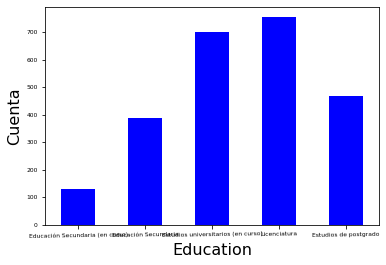

In [ ]:
edu=TM['NivelAcademico'].value_counts().sort_index()
ax=edu.plot(kind='bar',color=('b'),fontsize=6, legend=False,use_index=True,rot=1)
ax.set_xlabel('Education',fontsize=16)
ax.set_ylabel('Cuenta',fontsize=16)
plt.show()